In [ ]:
!python --version

Python 3.10.12


In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


**How Do You Feel Now?**  
This project focuses on **Emotion Classification** using Natural Language Processing (NLP). The goal is to develop models that accurately classify tweets into six sentiment categories: **sadness, joy, love, anger, fear**, and **surprise**.
* sadness (0)
* joy (1)
* love (2)
* anger (3)
* fear (4)
* surprise (5)

The project centers on understanding how emotions are conveyed in short texts, such as tweets, and classifying them accordingly.

**Dataset**: [Emotions Dataset](https://www.kaggle.com/datasets/nelgiriyewithana/emotions/data)  


In [ ]:
!pip uninstall -y torch
!pip install torch==2.3.0
!pip install torchtext==0.18

Found existing installation: torch 2.4.1+cu121
Uninstalling torch-2.4.1+cu121:
  Successfully uninstalled torch-2.4.1+cu121
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 106.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 89.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 6.5 MB/s eta 0:00:

### Import Libraries

In [ ]:
# Import necessary libraries for data manipulation and visualization
import numpy as np
import pandas as pd
import random
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords

# PyTorch-related imports for building and training models
import torch
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader , Dataset
import torch.optim as optim
from tqdm import tqdm

# # PyTorch neural network components
import torch.nn as nn
import torch.nn.functional as F

# # Scikit-learn for model evaluation and train-test splitting
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, f1_score

pd.set_option('display.max_colwidth', None)
# Suppress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/torchtext/data/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
/usr/local/lib/python3.10/dist-packages/torchtext/vocab/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
/usr/local/lib/python3.10/dist-packages/torchtext/utils.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated

### Reading Data

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Data/text.csv/text.csv")
df.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax and unwind and frankly needed it after those last few weeks around the end of uni and the expo i have lately started to find myself feeling a bit listless which is never really a good thing,0
2,2,i gave up my internship with the dmrg and am feeling distraught,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughly weary of my job after having taken the university entrance exam i suffered from anxiety for weeks as i did not want to carry on with my work studies were the only alternative,4


In [ ]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
df.describe(include='object').T

,count,unique,top,freq
text,416809,393822,i feel more adventurous willing to take risks,16


In [ ]:
df.duplicated().sum()

686

In [ ]:
df.drop_duplicates(subset=['text'], inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['text'].str.islower().sum()

393822

In [ ]:
df.shape

(393822, 2)

### EDA Overview

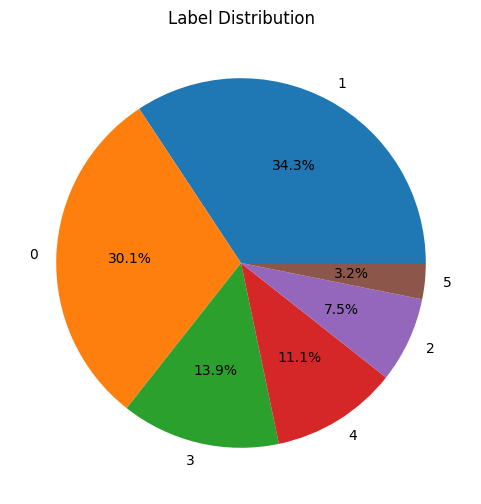

In [ ]:
label_counts = df['label'].value_counts()
label_counts.plot.pie(autopct='%1.1f%%', figsize=(6, 6), ylabel='', title="Label Distribution")
plt.show()

In [ ]:
df['text_length'] = df['text'].apply(len)

In [ ]:
fig = px.histogram(df, x="text_length", color="label")
fig.show()

### Data Cleaning

In [ ]:
# Removing non alpha numeric characters
df['text'] = df['text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

In [ ]:
# lowercasing the word in text
df['text'] = df['text'].str.lower()

In [ ]:
# Removing numeric from text
df['text'] = df['text'].str.replace(r'\d+', '', regex=True)

In [ ]:
# Removing white space from text
df['text'] = df['text'].str.replace(r'\s+', ' ', regex=True)

In [ ]:
# Removing special character
df['text'] = df['text'].str.replace(r'[^\w\s]', '', regex=True)

In [ ]:
# removing urls
df['text'] = df['text'].str.replace(r'http\S+', '', regex=True)

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda text: " ".join([word for word in text.split() if word not in (stop)]))

In [ ]:
# dropping text_length
df.drop(['text_length'],axis=1,inplace=True)

In [ ]:
df.head()

,text,label
0,feel really helpless heavy hearted,4
1,ive enjoyed able slouch relax unwind frankly needed last weeks around end uni expo lately started find feeling bit listless never really good thing,0
2,gave internship dmrg feeling distraught,4
3,dont know feel lost,0
4,kindergarten teacher thoroughly weary job taken university entrance exam suffered anxiety weeks want carry work studies alternative,4


In [ ]:
dfdfg

NameError: name 'dfdfg' is not defined

### Utility Function

In [ ]:
class Config:
    MAX_LEN = 128
    BATCH_SIZE = 128
    CLASSES = 6
    EPOCHS = 5
    VOCAB = 0
    PATH_DATA = r'/content/drive/MyDrive/Colab Data/text.csv/text.csv'
    PATH_OUTPUT = r'//content/drive/MyDrive/Colab Data/text.csv/working/'

config = Config()

In [ ]:
class EmotionsDataset(Dataset):
    def __init__(self, data, labels, tokenizer, vocab, max_length):
        """
        Args:
            dataframe (pd.DataFrame): The input data containing 'text' and 'label' columns.
            vocab (Vocabulary): A torchtext Vocab object for converting tokens to indices.
            tokenizer (function): Tokenizer function for splitting text into tokens.
            max_len (int): The maximum length of the tokenized input sequence.
        """
        self.data  = data
        self.labels = labels
        self.tokenizer = tokenizer
        self.vocab = vocab
        self.max_length = max_length
        self.padding = vocab['<pad>']


    def __len__(self):
        return len(self.labels)

    def __getitem__(self, index):
        if index < len(self.labels):
            data = self.data[index]
            label = self.labels[index]

            # Tokenizing the text
            tokenized_data = self.tokenizer(data)

            # Converting tokens to indices using the vocabulary
            token_ids = [self.vocab[token] for token in tokenized_data if token in self.vocab]

            # Padding or truncating to max_len
            if len(token_ids) < self.max_length:
                token_ids += [self.padding] * (self.max_length - (len(token_ids)))
            else:
                token_ids = token_ids[:self.max_length]

            # Convert token indices to tensor
            tokens = torch.tensor(token_ids,dtype=torch.long)

            # Convert label to tensor
            label = torch.tensor(label,dtype=torch.float)

            return tokens, label
#             return {
#                 'input_ids': tokens,
#                 'labels': label,
#             }

        else:
            raise IndexError("Index out of range")

In [ ]:
# Tokenizer function
tokenizer = get_tokenizer("basic_english")

def yield_tokens(data_iter, tokenizer):
    for text in data_iter:
        yield tokenizer(text)

# Vocabulary building function
vocab = build_vocab_from_iterator(yield_tokens(df['text'], tokenizer), specials=["<sos>" ,"<unk>","<pad>","<eos>"])
vocab.set_default_index(vocab['<unk>'])

In [ ]:
len(vocab)

75151

In [ ]:
config.VOCAB = len(vocab)
config.VOCAB

75151

### Splitting Dataset

In [ ]:
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['label'])
test_df, val_df = train_test_split(test_df, test_size=0.5, stratify=test_df['label'])

In [ ]:
train_df.shape, test_df.shape ,val_df.shape

((315057, 2), (39382, 2), (39383, 2))

### Labels one-hot encoding

In [ ]:
train_labels_class = to_categorical(train_df.label, num_classes=6)
val_labels_class = to_categorical(val_df.label,num_classes=6)

In [ ]:
train_labels_class.shape, val_labels_class.shape

((315057, 6), (39383, 6))

In [ ]:
train_dataset = EmotionsDataset(train_df.text.to_list(), train_labels_class.tolist(), tokenizer, vocab, config.MAX_LEN)
val_dataset = EmotionsDataset(val_df.text.to_list(), val_labels_class.tolist(), tokenizer, vocab, config.MAX_LEN)

train_data_loader = DataLoader(train_dataset, batch_size=config.BATCH_SIZE)
val_data_loader = DataLoader(val_dataset, batch_size=config.BATCH_SIZE)

In [ ]:
input_data, label = train_dataset[1]
print("Input Data:", input_data.shape)
print("Label:", label.shape)

Input Data: torch.Size([128])
Label: torch.Size([6])


### Create Model

In [ ]:
class BidirectionalLSTM(nn.Module):
    def __init__(self, vocab_size, embedding_size, hidden_size, num_classes):
        super(BidirectionalLSTM, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_size)
        self.lstm = nn.LSTM(embedding_size, hidden_size, batch_first=True, bidirectional=True)
        self.conv_layer1 = nn.Conv1d(in_channels=hidden_size * 2, out_channels=128, kernel_size=3, padding=1)
        self.batch_norm = nn.BatchNorm1d(128)
        self.dropout = nn.Dropout(0.5)
        self.fc = nn.Linear(128, num_classes)

    def forward(self,x):
        x = self.embedding(x)         # Convert word indices to embeddings
        lstm_out, _ = self.lstm(x)    # Forward pass through the LSTM

        conv_out = F.relu(self.conv_layer1(lstm_out.transpose(1,2)))  # Apply 1D convolution
        conv_out = self.batch_norm(conv_out)  # # Batch normalization

        pooling = F.max_pool1d(conv_out, conv_out.size(2)).squeeze(2)  # Max pooling

        pooling = self.dropout(pooling)  # Apply dropout
        out = self.fc(pooling)    # Final fully connected layer

        return out


model = BidirectionalLSTM(vocab_size=config.VOCAB, embedding_size=128, hidden_size=128, num_classes=config.CLASSES)

In [ ]:
model

BidirectionalLSTM(
  (embedding): Embedding(75151, 128)
  (lstm): LSTM(128, 128, batch_first=True, bidirectional=True)
  (conv_layer1): Conv1d(256, 128, kernel_size=(3,), stride=(1,), padding=(1,))
  (batch_norm): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=128, out_features=6, bias=True)
)

### Model Training

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

BidirectionalLSTM(
  (embedding): Embedding(75151, 128)
  (lstm): LSTM(128, 128, batch_first=True, bidirectional=True)
  (conv_layer1): Conv1d(256, 128, kernel_size=(3,), stride=(1,), padding=(1,))
  (batch_norm): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=128, out_features=6, bias=True)
)

In [ ]:
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = config.EPOCHS

In [ ]:
# Initialize lists to store losses and accuracies
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Training loop
for epoch in range(num_epochs):
    model.train()
    epoch_train_loss = 0.0
    epoch_train_accuracy = 0.0
    total_train_samples = 0

    for  batch in tqdm(train_data_loader):
        optimizer.zero_grad()
        inputs, labels = batch
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        true_labels = torch.argmax(labels, dim=1)
        _, predicted = torch.max(outputs, 1)
        batch_accuracy = accuracy_score(true_labels.cpu().numpy(), predicted.cpu().numpy())

        epoch_train_loss += loss.item() * inputs.size(0)
        epoch_train_accuracy += batch_accuracy * inputs.size(0)
        total_train_samples += inputs.size(0)

    epoch_train_loss /= total_train_samples
    epoch_train_accuracy /= total_train_samples

    train_losses.append(epoch_train_loss)
    train_accuracies.append(epoch_train_accuracy)

    print(f"Epoch [{epoch+1}/{num_epochs}], "
          f"Train Loss: {epoch_train_loss:.4f}, "
          f"Train Accuracy: {epoch_train_accuracy:.4f}")

    # Validation loop
    model.eval()
    epoch_val_loss = 0.0
    epoch_val_accuracy = 0.0
    total_val_samples = 0

    with torch.no_grad():
        for batch in val_data_loader:
            inputs, labels = batch
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            true_labels = torch.argmax(labels, dim=1)
            _, predicted = torch.max(outputs, 1)
            batch_accuracy = accuracy_score(true_labels.cpu().numpy(), predicted.cpu().numpy())

            epoch_val_loss += loss.item() * inputs.size(0)
            epoch_val_accuracy += batch_accuracy * inputs.size(0)
            total_val_samples += inputs.size(0)

    epoch_val_loss /= total_val_samples
    epoch_val_accuracy /= total_val_samples

    val_losses.append(epoch_val_loss)
    val_accuracies.append(epoch_val_accuracy)

    print(f"Epoch [{epoch+1}/{num_epochs}], "
          f"Val Loss: {epoch_val_loss:.4f}, "
          f"Val Accuracy: {epoch_val_accuracy:.4f}")

100%|██████████| 2462/2462 [01:17<00:00, 31.86it/s]


Epoch [1/5], Train Loss: 0.4280, Train Accuracy: 0.8499
Epoch [1/5], Val Loss: 0.0850, Val Accuracy: 0.9589


100%|██████████| 2462/2462 [01:14<00:00, 33.26it/s]


Epoch [2/5], Train Loss: 0.0831, Train Accuracy: 0.9604
Epoch [2/5], Val Loss: 0.0720, Val Accuracy: 0.9632


100%|██████████| 2462/2462 [01:14<00:00, 32.97it/s]


Epoch [3/5], Train Loss: 0.0678, Train Accuracy: 0.9643
Epoch [3/5], Val Loss: 0.0683, Val Accuracy: 0.9641


100%|██████████| 2462/2462 [01:13<00:00, 33.49it/s]


Epoch [4/5], Train Loss: 0.0600, Train Accuracy: 0.9670
Epoch [4/5], Val Loss: 0.0660, Val Accuracy: 0.9635


100%|██████████| 2462/2462 [01:13<00:00, 33.32it/s]


Epoch [5/5], Train Loss: 0.0538, Train Accuracy: 0.9698
Epoch [5/5], Val Loss: 0.0688, Val Accuracy: 0.9648


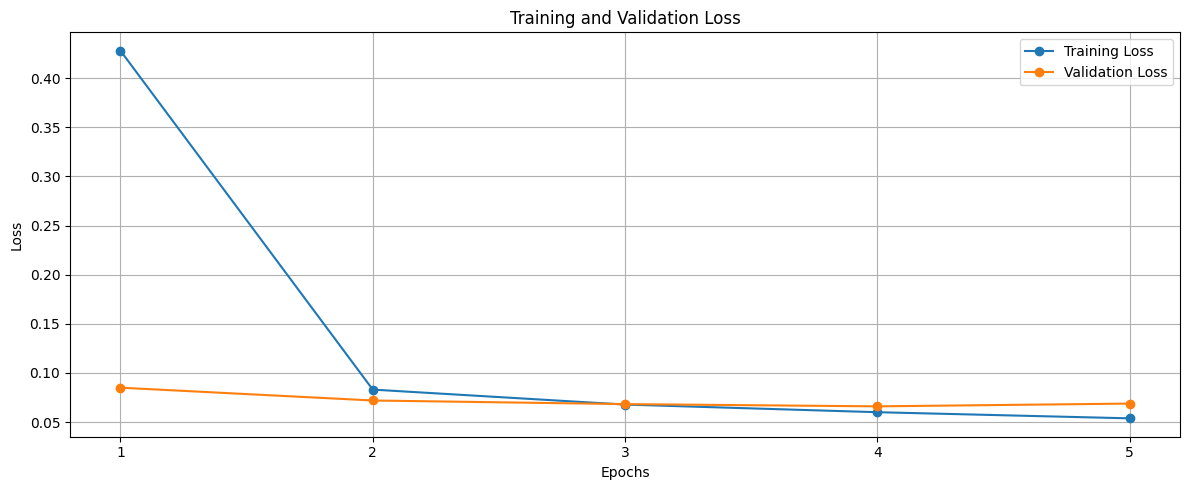

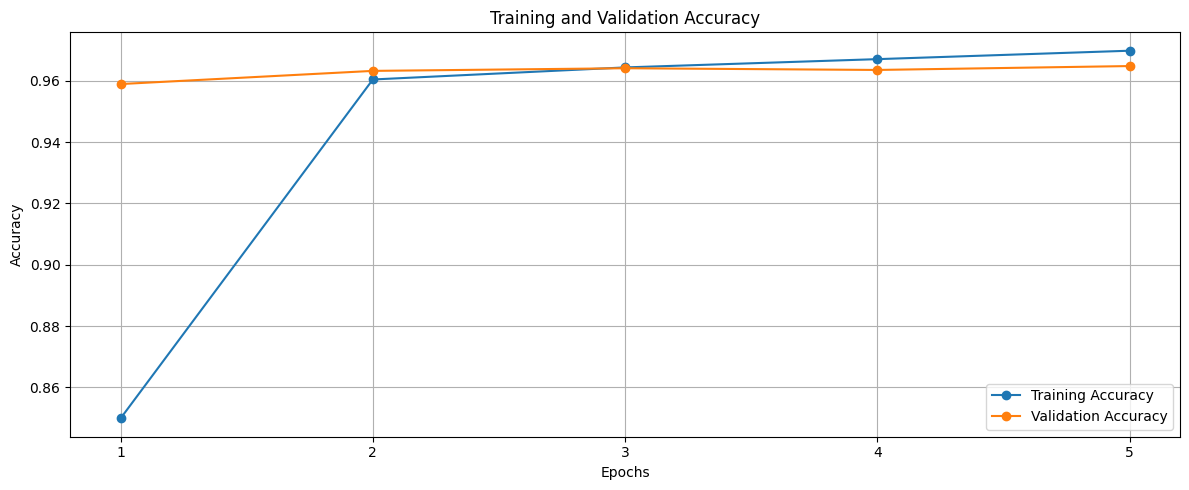

In [ ]:
# Plotting train and validation losses
plt.figure(figsize=(12, 5))
plt.plot(range(1, num_epochs + 1), train_losses, '-o', label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses, '-o', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.xticks(range(1, num_epochs + 1))
plt.tight_layout()
plt.show()

# Plotting train and validation accuracies
plt.figure(figsize=(12, 5))
plt.plot(range(1, num_epochs + 1), train_accuracies, '-o', label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), val_accuracies, '-o', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.xticks(range(1, num_epochs + 1))
plt.tight_layout()
plt.show()

### Test

In [ ]:
test_labels_class = to_categorical(test_df.label,num_classes=6)

In [ ]:
test_labels_class.shape

(39382, 6)

In [ ]:
test_dataset = EmotionsDataset(test_df.text.to_list(), test_labels_class.tolist(), tokenizer, vocab, config.MAX_LEN)

test_data_loader = DataLoader(test_dataset, batch_size=config.BATCH_SIZE)

In [ ]:
input_data, label = test_dataset[1]
print("Input Data:", input_data.shape)
print("Label:", label.shape)

Input Data: torch.Size([128])
Label: torch.Size([6])


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

model.eval()  # Set the model to evaluation mode
test_labels = []
predictions = []

with torch.no_grad():
    for batch in tqdm(test_data_loader):
        inputs, labels = batch
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)

        # Convert labels to class indices
        true_labels = torch.argmax(labels, dim=1)

        # Convert outputs to predicted class indices
        _, predicted = torch.max(outputs, 1)

        # Collect true labels and prediction4s
        test_labels.extend(true_labels.cpu().numpy())
        predictions.extend(predicted.cpu().numpy())

# Convert lists to numpy arrays
test_labels = np.array(test_labels)
predictions = np.array(predictions)

100%|██████████| 308/308 [00:05<00:00, 58.93it/s]


### Evaluation

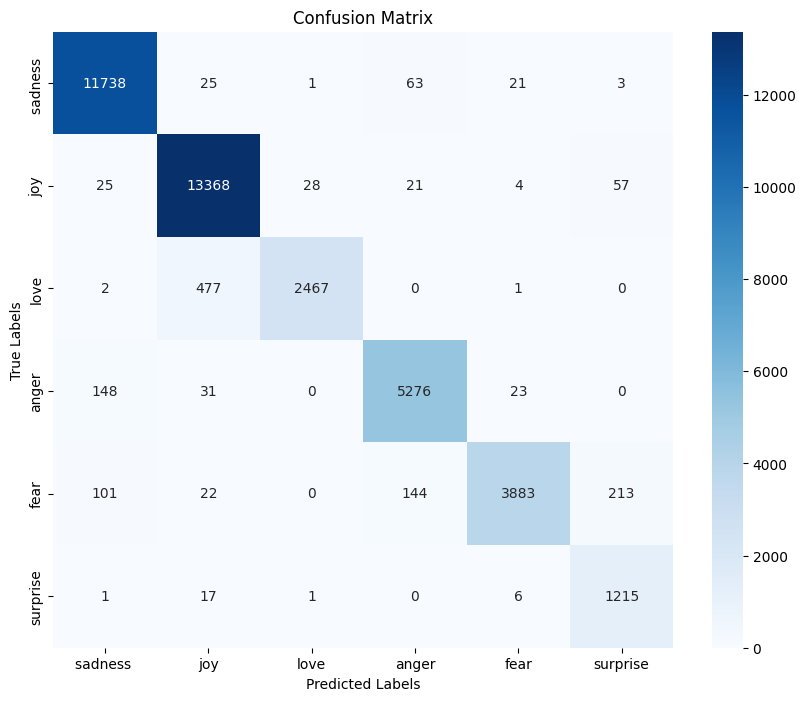

In [ ]:
# Calculate confusion matrix
label_names= ['sadness ','joy' , 'love' ,'anger' ,'fear' , 'surprise' ]
cm = confusion_matrix(test_labels, predictions)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=label_names, yticklabels=label_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
# Generate classification report
report = classification_report(test_labels, predictions, target_names=label_names)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

    sadness        0.98      0.99      0.98     11851
         joy       0.96      0.99      0.97     13503
        love       0.99      0.84      0.91      2947
       anger       0.96      0.96      0.96      5478
        fear       0.99      0.89      0.94      4363
    surprise       0.82      0.98      0.89      1240

    accuracy                           0.96     39382
   macro avg       0.95      0.94      0.94     39382
weighted avg       0.97      0.96      0.96     39382



In [ ]:
# save
model_scripted = torch.jit.script(model)
model_scripted.save('model_emotions.pt')

In [ ]:
model_path='/content/model_emotions.pt'
model_emotions = torch.jit.load(model_path)
model_emotions.eval()

RecursiveScriptModule(
  original_name=BidirectionalLSTM
  (embedding): RecursiveScriptModule(original_name=Embedding)
  (lstm): RecursiveScriptModule(original_name=LSTM)
  (conv_layer1): RecursiveScriptModule(original_name=Conv1d)
  (batch_norm): RecursiveScriptModule(original_name=BatchNorm1d)
  (dropout): RecursiveScriptModule(original_name=Dropout)
  (fc): RecursiveScriptModule(original_name=Linear)
)

In [ ]:
import torch
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import Vocab
import torch.nn.functional as F

def tokenize_text(tokenizer, text, vocab, max_length):
    # Tokenize input text
    tokenized_text = tokenizer(text)

    # Convert tokens to indices using vocab
    indexed_tokens = [vocab[token] for token in tokenized_text if token in vocab]

    # Pad or truncate sequence to max_length
    if len(indexed_tokens) < max_length:
        indexed_tokens += [vocab['<pad>']] * (max_length - len(indexed_tokens))
    else:
        indexed_tokens = indexed_tokens[:max_length]

    # Convert to tensor
    input_tensor = torch.LongTensor(indexed_tokens).unsqueeze(0)  # Add batch dimension

    return input_tensor

In [ ]:
index_to_emotion = {0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}


def inference(model, tokenizer, vocab, max_length, text, device):
    # Tokenize and encode input text
    input_tensor = tokenize_text(tokenizer, text, vocab, max_length).to(device)

    # Set model to evaluation mode
    model.eval()

    # Perform inference
    with torch.no_grad():
        outputs = model(input_tensor)

    # Apply softmax to get probabilities
    probabilities = F.softmax(outputs, dim=1)

    # Get predicted label (assuming it's a classification task)
    _, predicted = torch.max(probabilities, 1)

    return predicted.item(), probabilities.squeeze().tolist()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
txt = "Please be quiet"
max_length=128


predicted_label, probabilities = inference(model_emotions, tokenizer, vocab, max_length, txt, device)

print(f"Predicted Label: {index_to_emotion[predicted_label]}")
print(f"Probabilities: {probabilities}")

Predicted Label: anger
Probabilities: [0.25612521171569824, 0.3040129840373993, 0.0061089289374649525, 0.3627691864967346, 0.06334587186574936, 0.007637724280357361]
